# Install detectron2

In [1]:
# install dependencies: 
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())
# opencv is pre-installed on colab

1.8.1+cu102 True


In [2]:
# install detectron2: (Colab has CUDA 10.1 + torch 1.8)
# See https://detectron2.readthedocs.io/tutorials/install.html for instructions
import torch
# exit(0)  # After installation, you need to "restart runtime" in Colab. This line can also restart runtime

In [3]:
# Some basic setup:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import os, json, cv2, random
import matplotlib.pyplot as plt

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

# Run a pre-trained detectron2 model

We first download an image from the COCO dataset:

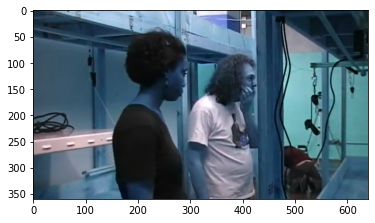

In [11]:
import cv2

im = cv2.imread("./shot00032_13_RKF.png")
plt.imshow(im)
plt.show()

Then, we create a detectron2 config and a detectron2 `DefaultPredictor` to run inference on this image.

In [12]:
cfg = get_cfg()
# add project-specific config (e.g., TensorMask) here if you're not running a model in detectron2's core library
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
# Find a model from detectron2's model zoo. You can use the https://dl.fbaipublicfiles... url as well
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
predictor = DefaultPredictor(cfg)
outputs = predictor(im)

In [13]:
for b, c in zip(outputs["instances"].pred_classes, outputs["instances"].pred_boxes):
    print(b, c)

tensor(0, device='cuda:0') tensor([148.1756,  36.9153, 305.6687, 354.1147], device='cuda:0')
tensor(0, device='cuda:0') tensor([290.4329,  86.8326, 430.6667, 357.9114], device='cuda:0')
tensor(39, device='cuda:0') tensor([379.0949, 196.0391, 401.8698, 263.6967], device='cuda:0')


In [14]:
# look at the outputs. See https://detectron2.readthedocs.io/tutorials/models.html#model-output-format for specification
print(outputs["instances"].pred_classes)
print(outputs["instances"].pred_boxes)

for data in outputs["instances"].pred_classes:
    num = data.item()
    print(MetadataCatalog.get(cfg.DATASETS.TRAIN[0]).thing_classes[num])

tensor([ 0,  0, 39], device='cuda:0')
Boxes(tensor([[148.1756,  36.9153, 305.6687, 354.1147],
        [290.4329,  86.8326, 430.6667, 357.9114],
        [379.0949, 196.0391, 401.8698, 263.6967]], device='cuda:0'))
person
person
bottle


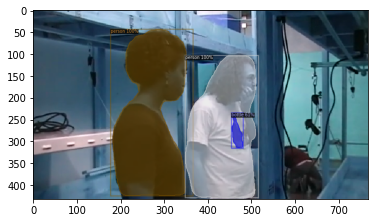

In [15]:
# We can use `Visualizer` to draw the predictions on the image.
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
plt.imshow(out.get_image()[:, :, ::-1])
plt.show()

In [27]:
out